The program is mainly based on codes from https://github.com/deepmind/abstract-reasoning-matrices/issues/1



structure_bin [[0 1 0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


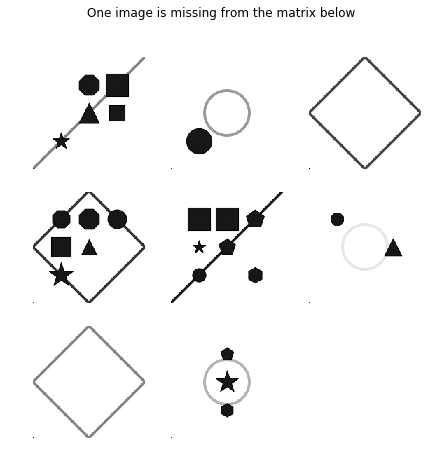

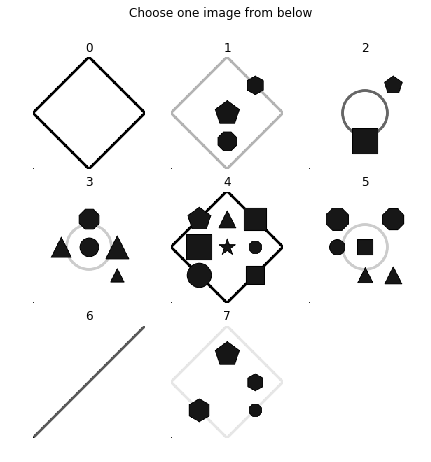

The correct answer is 6
The reason for the answer is [[b'line' b'type' b'consistent_union']]


In [11]:
import numpy as np
import matplotlib.pyplot as plot
from scipy.ndimage import imread
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline
COLORMAP = 'gray'

data = np.load("neutral/PGM_neutral_train_2.npz")

data_item = data['image'].reshape(16, 160, 160) 


# target = the index of the correct answer among the "choice" panels
# structure_bin = meta_matrix i.e.  4x12 binary array encoding the structure of the matrix
images, target, structure_bin, structure_str = data['image'], np.asscalar(data['target']), data['relation_structure_encoded'], data['relation_structure']

images.shape, target, structure_bin.shape, structure_str.shape
['target', 'image', 'relation_structure_encoded', 'relation_structure', 'meta_target']

print('structure_bin',structure_bin)

figure_size = (7, 7)
context_figure = plot.figure(figsize=figure_size)
context_figure.suptitle('One image is missing from the matrix below')
num_context_figure_row = 3
num_context_figure_col = 3
num_context_image = 8

for i in range(num_context_image):    
    axis = context_figure.add_subplot(num_context_figure_row, num_context_figure_col, i+1)
    axis.set_axis_off()
    plot.imshow(data_item[i], cmap="gray")        
       
plot.show()

choice_figure = plot.figure(figsize=figure_size)
choice_figure.suptitle('Choose one image from below')
num_choice_figure_row = 3
num_choice_figure_col = 3

num_choice_image = 8
for i in range(num_choice_image):
    axis = choice_figure.add_subplot(num_choice_figure_row, num_choice_figure_col, i+1)
    axis.set_axis_off()
    axis.set_title(i)    
    plot.imshow(data_item[i+num_context_image], cmap="gray")  

plot.show()
    

print('The correct answer is ' + str(target))
print('The reason for the answer is ' + str(structure_str))